In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

/Users/judebuenaseda/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [58]:
df = pd.read_csv('Cleaned_fifa_data.csv', index_col = 0)

### PCA
- Overall intuition of PCA

- What is PCA good for? Advantages of PCA

- Using and building PCA in sklearn


### Clustering
- K-means clustering details - what are the step by step process of building a K-means model?

- Building K-means model in sklearn

- Evaluating clustering (what are some metrics?)


### Natural Language Processing
- What is tfidf?

- How to feature engineer in sklearn for text data?

- Use naive bayes to make classification on engineered text features

# PCA

## Overall intuition 

#### Takes features of the data and generates eigenvectors and eigenvalues from the covairance matrix. And based on how much of the data is explained by our principal components they can replace the features in the data to reduce the dimensionality

## What is it good for? Advantages of PCA

#### Creates a simpler model by reducing dimentionality, it makes the model easier to understand and explain with less features using structural loadings. 

## Using PCA

In [59]:
X = df.drop(columns = 'Overall')
y = df.Overall

In [47]:
X = StandardScaler().fit_transform(X)

In [48]:
pca = PCA()
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)

In [6]:
principalDf

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,-11.102406,-3.351946,13.946258,-5.287466,6.352366,8.345955,15.285229,-2.674816,0.099073,2.102636,...,-0.275505,0.521389,-0.205379,-0.292562,-0.024781,-0.347596,-0.148520,0.052027,0.007907,0.000017
1,-10.317006,-1.134406,13.229911,-1.510236,7.235912,5.468038,11.410526,-1.891569,0.175934,1.520067,...,0.015299,0.399413,-0.137535,-0.256930,0.241534,-0.229444,-0.146959,0.135018,0.153922,0.000210
2,-9.944877,-3.964188,9.794007,-3.654410,3.847322,5.334132,9.970832,-1.006981,1.648844,1.275134,...,0.007184,0.130495,-0.236712,-0.228868,0.087890,-0.182289,-0.295151,0.083968,-0.408570,-0.000052
3,7.500154,-0.404121,11.400309,-5.897020,4.322288,3.404846,7.133612,-2.300706,1.143214,0.641003,...,0.117706,-0.252066,0.080320,-0.104163,0.445276,0.073523,-0.133783,0.103737,0.233226,0.000285
4,-10.366917,-0.232431,10.235270,-3.728808,2.826677,5.547440,9.638523,-1.215923,2.118179,0.936575,...,0.070142,0.075352,0.073910,0.385747,0.052916,0.152373,0.069797,-0.059660,-0.002723,0.000107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16638,2.399182,-1.178304,-3.058184,-1.229595,-0.671560,2.030578,0.021455,0.462820,-1.671158,0.749211,...,0.155260,-0.026758,0.131257,0.140499,-0.108515,-0.028024,0.208661,-0.018903,-0.024401,-0.001330
16639,4.818801,-0.878878,-1.731584,3.588766,-0.332065,2.859012,0.021026,0.254893,-1.493046,0.649419,...,-0.063778,-0.034251,0.361689,-0.019544,-0.178077,0.236075,0.091433,0.092023,-0.253827,-0.001117
16640,2.903125,-3.595729,-3.095183,0.803307,0.905010,2.204880,0.321572,1.239249,-0.611871,0.713048,...,0.369336,0.267189,-0.063056,-0.104667,0.038424,0.199741,-0.117143,0.280030,0.048614,-0.001404
16641,2.881067,-3.318395,-3.232664,1.439010,-0.798542,2.860381,0.356931,0.773483,-0.230639,0.299162,...,-0.013140,-0.514463,-0.120334,-0.199403,0.142654,0.230562,-0.163421,-0.160728,-0.084768,-0.001455


Text(0, 0.5, 'proportion of explained variance')

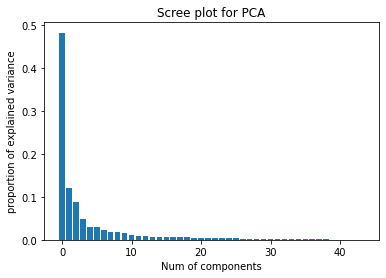

In [7]:
index = np.arange(44)
plt.bar(index, pca.explained_variance_ratio_)
plt.title('Scree plot for PCA')
plt.xlabel('Num of components')
plt.ylabel('proportion of explained variance')

In [8]:
our_components = principalDf[[0,1,2,3,4,5]]

In [9]:
our_components

,0,1,2,3,4,5
0,-11.102406,-3.351946,13.946258,-5.287466,6.352366,8.345955
1,-10.317006,-1.134406,13.229911,-1.510236,7.235912,5.468038
2,-9.944877,-3.964188,9.794007,-3.654410,3.847322,5.334132
3,7.500154,-0.404121,11.400309,-5.897020,4.322288,3.404846
4,-10.366917,-0.232431,10.235270,-3.728808,2.826677,5.547440
...,...,...,...,...,...,...
16638,2.399182,-1.178304,-3.058184,-1.229595,-0.671560,2.030578
16639,4.818801,-0.878878,-1.731584,3.588766,-0.332065,2.859012
16640,2.903125,-3.595729,-3.095183,0.803307,0.905010,2.204880
16641,2.881067,-3.318395,-3.232664,1.439010,-0.798542,2.860381


In [10]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_
print(eig_values)
print(eig_vectors)

[2.11984416e+01 5.26013148e+00 3.89678267e+00 2.16722768e+00
 1.33714760e+00 1.25914650e+00 1.01495025e+00 8.39435754e-01
 8.36759813e-01 6.70254992e-01 5.27547585e-01 4.34240263e-01
 3.56114948e-01 3.21171432e-01 2.94700113e-01 2.83520629e-01
 2.61976647e-01 2.47363895e-01 2.37551752e-01 2.25450599e-01
 2.10711349e-01 1.98475797e-01 1.97130568e-01 1.84807585e-01
 1.74338680e-01 1.53652760e-01 1.32848895e-01 1.24843869e-01
 1.21789459e-01 1.16027468e-01 1.02473757e-01 8.71458004e-02
 8.16532532e-02 7.16489871e-02 6.70215181e-02 6.44174826e-02
 6.00343315e-02 3.72979754e-02 3.68943828e-02 3.06171449e-02
 2.99609984e-02 2.61189381e-02 2.27821826e-02 3.45280109e-05]
[[-2.56963438e-02  1.63466629e-02 -5.93925219e-02 ...  1.79903547e-01
   1.80855118e-01  4.30288550e-02]
 [ 1.08029205e-01  1.36110811e-03  3.56903213e-02 ... -5.97975368e-02
  -6.11569874e-02 -3.73855076e-03]
 [ 2.77727203e-01 -1.55718741e-01  2.82295106e-01 ...  2.14659557e-01
   2.11702911e-01 -1.76048867e-01]
 ...
 [ 8.545

In [ ]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]

In [ ]:
structure_loading_1 = pc1* np.sqrt(eig_values[0])
str_loading_1 = pd.Series(structure_loading_1, index=X.columns)
str_loading_1.sort_values(ascending = False)

In [ ]:
structure_loading_2 = pc2* np.sqrt(eig_values[1])
str_loading_2 = pd.Series(structure_loading_2, index=X.columns)
str_loading_2.sort_values(ascending = False)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
logreg = LogisticRegression()

In [14]:
logreg.fit(X_train, y_train)

/Users/judebuenaseda/.pyenv/versions/3.8.2/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred = logreg.predict(X_test)

In [16]:
accuracy_score(y_test, y_pred)

0.9493901328964136

In [17]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(our_components, y, test_size=0.33, random_state=42)

In [18]:
logreg_pca = LogisticRegression()

In [19]:
logreg_pca.fit(X_train_pca, y_train_pca)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred_pca = logreg_pca.predict(X_test_pca)

In [67]:
accuracy_score(y_test_pca, y_pred_pca)

0.9484798834880758

## K-Means Clustering


In [21]:
### Clustering
#K-means clustering details - what are the step by step process of building a K-means model?
'''
1) Scale the data - euclidean distance is going to be affected by larger values if the data is not scaled
2) Initialize centroids at random points 
3) Assign values to the points corresponding to the closest centroid 
4) Reassign centroid point based on the mean of all the points within its cluster
5) repeat 3 and 4 until centroids stabalize 
'''

In [102]:
 #Building K-means model in sklearn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(our_components.values)

In [103]:
predicted_clusters = kmeans.predict(our_components.values)

In [99]:
our_components.values

array([[-11.10240579,  -3.35194611,  13.94625776,  -5.28746579,
          6.3523664 ,   8.34595481],
       [-10.31700615,  -1.13440639,  13.2299111 ,  -1.51023641,
          7.23591158,   5.46803783],
       [ -9.94487722,  -3.96418822,   9.7940068 ,  -3.65441022,
          3.84732247,   5.33413243],
       ...,
       [  2.90312534,  -3.59572947,  -3.09518255,   0.80330704,
          0.90501004,   2.20488036],
       [  2.88106711,  -3.31839517,  -3.23266362,   1.43900996,
         -0.79854213,   2.86038066],
       [  2.55371186,   0.05452444,  -2.12690361,   0.18055827,
          0.07172358,   1.87479059]])

In [100]:
#Evaluating clustering (what are some metrics?)

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score


print(silhouette_score(X.values, predicted_clusters))
print(calinski_harabasz_score(X.values, predicted_clusters))

0.3012070955620654
3419.5208743520247


In [104]:
print(silhouette_score(our_components.values, predicted_clusters))
print(calinski_harabasz_score(our_components.values, predicted_clusters))

0.30030396676468335
13144.698439403559


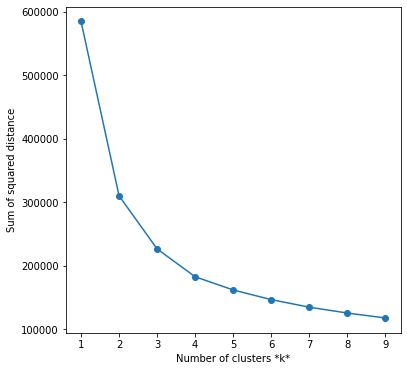

In [96]:
sse = []
list_k = list(range(1, 10))
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(our_components)
    sse.append(km.inertia_)
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [90]:
# from sklearn.metrics import homogeneity_score
# from sklearn.metrics import v_measure_score

# homogeneity_score(X.values.flatten(), predicted_clusters.flatten())
# v_measure_score(X.values.flatten(), predicted_clusters.flatten())